In [1]:
import barnaba as bb
import mdtraj as md

traj1 = md.load("RUN_1/0/SL5A_REST_1.crop.xtc",top="SL5a_ext_gmx.pdb",stride=2)
traj2 = md.load("RUN_2/0/SL5A_REST_2.crop.xtc",top="SL5a_ext_gmx.pdb",stride=2)

stacking1,pairing1, res = bb.annotate_traj(traj1)
stacking2,pairing2, res = bb.annotate_traj(traj2)

NameError: name 'pairing' is not defined

In [2]:
import numpy as np
wcmap_1 = np.zeros((len(res),len(res)))
omap_1 = np.zeros((len(res),len(res)))
gumap_1 = np.zeros((len(res),len(res)))
stats = {}
for i in range(len(pairing1)):
    for j in range(len(pairing1[i][0])):
        #for el in pairing[i][j][0]:
        #print(pairing[i][0][j])
        if(pairing1[i][1][j]=="WCc" or pairing1[i][1][j]=="WWc"): 
            wcmap_1[pairing1[i][0][j][0],pairing1[i][0][j][1]] += 1
        elif(pairing1[i][1][j]=="GUc"):
            gumap_1[pairing1[i][0][j][0],pairing1[i][0][j][1]] += 1
        elif(pairing1[i][1][j]!="XXX"):
            omap_1[pairing1[i][0][j][0],pairing1[i][0][j][1]] += 1
            if(pairing1[i][0][j][0]==13 and pairing1[i][0][j][1]==17):
                if(pairing1[i][1][j] in stats):
                    stats[pairing1[i][1][j]] += 100./len(pairing1)
                else:
                    stats[pairing1[i][1][j]] = 100./len(pairing1)
print(stats)
                
wcmap_1/= len(pairing1)
omap_1/= len(pairing1)
gumap_1/= len(pairing1)

{'WWt': 30.545936617846657, 'SWt': 0.549708003337108, 'HWt': 0.48913726700266724, 'HWc': 0.5165655249654332, 'WSc': 0.014856973063164988, 'HSc': 0.00457137632712769, 'HSt': 0.03314247837167575, 'SWc': 0.16799808002194233, 'WHc': 0.10971303185106447, 'HHt': 0.007999908572473456, 'WSt': 0.006857064490691534, 'WHt': 0.05371367184375041, 'SHc': 0.011428440817819222, 'SSt': 0.0011428440817819224}


In [3]:
import seaborn as sns

for i in range(len(res)):
    for k in range(len(res)):
        if(wcmap_1[i,k]>0.05):
            print("WC",res[i],res[k],wcmap_1[i,k])
        if(gumap_1[i,k]>0.05):
            print("GU",res[i],res[k],gumap_1[i,k])
        if(omap_1[i,k]>0.05):
            print("OO",res[i],res[k],omap_1[i,k])


WC G_1_0 C_33_0 0.9941829236237301
WC G_2_0 C_32_0 0.9996685752162833
WC G_3_0 C_31_0 0.9999542862367288
WC C_4_0 G_30_0 0.9999885715591822
WC U_5_0 A_29_0 0.9960686163586702
WC G_6_0 C_28_0 0.9999542862367288
WC C_7_0 G_27_0 0.9942400658278191
OO U_8_0 U_25_0 0.12306145072627742
WC U_8_0 U_26_0 0.5918218077507685
WC U_9_0 G_24_0 0.1559182180775077
GU U_9_0 G_24_0 0.27603113107278776
OO U_9_0 G_24_0 0.07331344784631033
WC U_9_0 U_25_0 0.28741385812733566
OO U_9_0 U_25_0 0.05383938469274637
WC U_9_0 U_26_0 0.06749637147004034
WC A_10_0 U_23_0 0.7100718848927441
OO A_10_0 U_23_0 0.24565433537902423
WC C_11_0 G_22_0 0.9830973360304454
WC G_12_0 C_21_0 0.9997942880652793
WC G_13_0 C_20_0 0.9998628587101862
WC U_14_0 G_18_0 0.060753591387527
GU U_14_0 G_18_0 0.48926297985165884
OO U_14_0 G_18_0 0.3251277128261391


In [4]:
wcmap_2 = np.zeros((len(res),len(res)))
omap_2 = np.zeros((len(res),len(res)))
gumap_2 = np.zeros((len(res),len(res)))
stats = {}
for i in range(len(pairing2)):
    for j in range(len(pairing2[i][0])):
        #for el in pairing[i][j][0]:
        #print(pairing[i][0][j])
        if(pairing2[i][1][j]=="WCc" or pairing2[i][1][j]=="WWc"): 
            wcmap_2[pairing2[i][0][j][0],pairing2[i][0][j][1]] += 1
        elif(pairing2[i][1][j]=="GUc"):
            gumap_2[pairing2[i][0][j][0],pairing2[i][0][j][1]] += 1
        elif(pairing2[i][1][j]!="XXX"):
            omap_2[pairing2[i][0][j][0],pairing2[i][0][j][1]] += 1
            if(pairing2[i][0][j][0]==13 and pairing2[i][0][j][1]==17):
                if(pairing2[i][1][j] in stats):
                    stats[pairing2[i][1][j]] += 100./len(pairing2)
                else:
                    stats[pairing2[i][1][j]] = 100./len(pairing2)
wcmap_2/= len(pairing2)
omap_2/= len(pairing2)
gumap_2/= len(pairing2)
print(stats)

{'SSt': 0.14835440726708354, 'WSc': 0.22367279864883427, 'WWt': 5.9273291641942505, 'WHc': 0.3663212671748745, 'SWt': 1.6318984799379526, 'SWc': 0.6641712694572531, 'WSt': 0.013694252978500026, 'HWt': 1.8281827726297926, 'HWc': 2.741132971196346, 'SSc': 0.013694252978500026, 'SHc': 0.05135344866937511, 'HSt': 0.029670881453416703, 'HSc': 0.0022823754964166705, 'WHt': 0.038800383439083395, 'HHt': 0.029670881453416703, 'HHc': 0.0011411877482083352}


In [5]:
for i in range(len(res)):
    for k in range(len(res)):
        if(wcmap_2[i,k]>0.05):
            print("WC",res[i],res[k],wcmap_2[i,k])
        if(gumap_2[i,k]>0.05):
            print("GU",res[i],res[k],gumap_2[i,k])
        if(omap_2[i,k]>0.05):
            print("OO",res[i],res[k],omap_2[i,k])

WC G_1_0 C_33_0 0.9972953850367462
WC G_2_0 C_32_0 0.9999771762450358
WC G_3_0 C_31_0 0.9999771762450358
WC C_4_0 G_30_0 0.9999543524900717
WC U_5_0 A_29_0 0.9943168850139225
WC G_6_0 C_28_0 0.9999771762450358
WC C_7_0 G_27_0 0.9994750536358241
OO U_8_0 U_25_0 0.08046514812616971
WC U_8_0 U_26_0 0.7492924635961108
WC U_9_0 G_24_0 0.18330898799470488
GU U_9_0 G_24_0 0.33748345277765096
WC U_9_0 U_25_0 0.3479024969187931
WC U_9_0 U_26_0 0.06969233578308304
WC A_10_0 U_23_0 0.7614461131145296
OO A_10_0 U_23_0 0.20200164331035741
WC C_11_0 G_22_0 0.9977518601360296
WC G_12_0 C_21_0 0.9960857260236454
WC G_13_0 C_20_0 0.9371091431962386
WC U_14_0 G_18_0 0.06990916145524262
GU U_14_0 G_18_0 0.433868169991327
OO U_14_0 G_18_0 0.1371137079472315
WC U_14_0 U_19_0 0.138140776920619


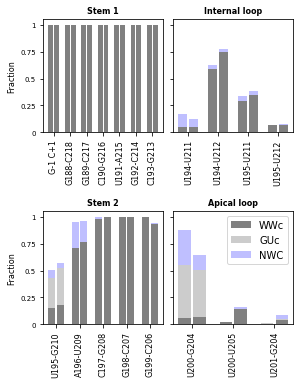

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(4.,5.5),sharey=True)
def xx(a,b):
    if(a==0 and b==32):
        return 0,0,1
    if(a==1 and b==31):
        return 0,0,2
    if(a==2 and b==30):
        return 0,0,3
    if(a==3 and b==29):
        return 0,0,4
    if(a==4 and b==28):
        return 0,0,5
    if(a==5 and b==27):
        return 0,0,6
    if(a==6 and b==26):
        return 0,0,7
    
    if(a==7 and b==24):
        return 0,1,1
    if(a==7 and b==25):
        return 0,1,2

    if(a==8 and b==24):
        return 0,1,3
    if(a==8 and b==25):
        return 0,1,4
    
    if(a==8 and b==23):
        return 1,0,1
    if(a==9 and b==22):
        return 1,0,2
    if(a==10 and b==21):
        return 1,0,3
    if(a==11 and b==20):
        return 1,0,4
    if(a==12 and b==19):
        return 1,0,5
    
    if(a==13 and b==17):
        return 1,1,1
    if(a==13 and b==18):
        return 1,1,2
    if(a==14 and b==17):
        return 1,1,3

    
    else:
        return -1,0,0
    
for i in range(len(res)):
    for k in range(len(res)):
        r,c, index = xx(i,k)
        if(r<0): continue
        #if(wcmap_1[i,k]>0.05 or wcmap_2[i,k]>0.05):

        axs[r,c].bar(index-0.18,wcmap_1[i,k],color='0.5',width=0.3)
        if(r==1 and c==1 and index==1):
             axs[r,c].bar(index+0.18,wcmap_2[i,k],color='0.5',width=0.3,label="WWc")
        else:
            axs[r,c].bar(index+0.18,wcmap_2[i,k],color='0.5',width=0.3)
            
        bottom1 = wcmap_1[i,k]
        bottom2 = wcmap_2[i,k]
        
        axs[r,c].bar(index-0.18,gumap_1[i,k],bottom=bottom1,color='0.8',width=0.3)
        if(r==1 and c==1 and index==1):
            axs[r,c].bar(index+0.18,gumap_2[i,k],bottom=bottom2,color='0.8',width=0.3,label="GUc")
        else:
            axs[r,c].bar(index+0.18,gumap_2[i,k],bottom=bottom2,color='0.8',width=0.3)
        
        bottom1 += gumap_1[i,k]
        bottom2 += gumap_2[i,k]
        
        axs[r,c].bar(index-0.18,omap_1[i,k],bottom=bottom1,color='#BFBFFF',width=0.3)
        if(r==1 and c==1 and index==1):
            axs[r,c].bar(index+0.18,omap_2[i,k],bottom=bottom2,color='#BFBFFF',width=0.3,label="NWC")
        else:
            axs[r,c].bar(index+0.18,omap_2[i,k],bottom=bottom2,color='#BFBFFF',width=0.3)

        if(c==0): 
            axs[r,c].set_ylabel("Fraction",fontsize=8)
            axs[r,c].set_yticks([0,0.25,0.5,0.75,1])
            axs[r,c].set_yticklabels([0,0.25,0.5,0.75,1],fontsize=7)
            
_ = axs[0,0].set_title("Stem 1",fontsize=8,weight="bold")
_ = axs[0,0].set_xticks([1,2,3,4,5,6,7])
#_ = axs[0,0].set_xticklabels(["G1-C33","G2-C32","G3-C31","C4-G30","U5-A29","G6-C28","C7-G27"],rotation=90)
_ = axs[0,0].set_xticklabels(["G-1 C+1","G188-C218","G189-C217","C190-G216","U191-A215","G192-C214","C193-G213"],rotation=90,fontsize=8)
_ = axs[0,1].set_title("Internal loop",fontsize=8,weight="bold")
_ = axs[0,1].set_xticks([1,2,3,4])
_ = axs[0,1].set_xticklabels(["U194-U211","U194-U212","U195-U211","U195-U212"],rotation=90,fontsize=8)

_ = axs[1,0].set_title("Stem 2",fontsize=8,weight="bold")
_ = axs[1,0].set_xticks([1,2,3,4,5])
_ = axs[1,0].set_xticklabels(["U195-G210","A196-U209","C197-G208","G198-C207","G199-C206"],rotation=90,fontsize=8)

_ = axs[1,1].set_title("Apical loop",fontsize=8,weight="bold")
_ = axs[1,1].set_xticks([1,2,3])
_ = axs[1,1].set_xticklabels(["U200-G204","U200-U205","U201-G204"],rotation=90,fontsize=8)
axs[1,1].legend()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.97, top=0.97, wspace=0.08, hspace=0.7)
plt.savefig("bp_SL5a.pdf")

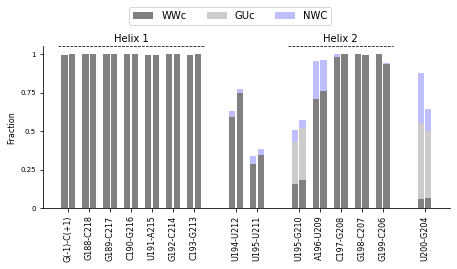

In [40]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,1,figsize=(6.5,3.))


resn = ["G(-1)","G188","G189","C190","U191","G192","C193","U194","U195","A196","C197","G198",\
        "G199","U200","U201","U202","C203","G204","U205","C206","C207","G208","U209","G210",\
        "U211","U212","G213","C214","A215","G216","C217","C218","C(+1)"]

def xx(a,b):
    if(a==0 and b==32):
        return 1
    if(a==1 and b==31):
        return 2
    if(a==2 and b==30):
        return 3
    if(a==3 and b==29):
        return 4
    if(a==4 and b==28):
        return 5
    if(a==5 and b==27):
        return 6
    if(a==6 and b==26):
        return 7
    

    if(a==7 and b==25):
        return 9

    if(a==8 and b==24):
        return 10

    
    if(a==8 and b==23):
        return 12
    if(a==9 and b==22):
        return 13
    if(a==10 and b==21):
        return 14
    if(a==11 and b==20):
        return 15
    if(a==12 and b==19):
        return 16
    
    if(a==13 and b==17):
        return 18


    
    else:
        return -1
    
labs = []
ticks = []
for i in range(len(res)):
    for k in range(len(res)):
        index = xx(i,k)
        if(index<0): continue
        #if(wcmap_1[i,k]>0.05 or wcmap_2[i,k]>0.05):

        axs.bar(index-0.18,wcmap_1[i,k],color='0.5',width=0.3)
        if(index==1):
            axs.bar(index+0.18,wcmap_2[i,k],color='0.5',width=0.3,label="WWc")
        else:
            axs.bar(index+0.18,wcmap_2[i,k],color='0.5',width=0.3)
            
        bottom1 = wcmap_1[i,k]
        bottom2 = wcmap_2[i,k]
        
        axs.bar(index-0.18,gumap_1[i,k],bottom=bottom1,color='0.8',width=0.3)
        if(index==1):
            axs.bar(index+0.18,gumap_2[i,k],bottom=bottom2,color='0.8',width=0.3,label="GUc")
        else:
            axs.bar(index+0.18,gumap_2[i,k],bottom=bottom2,color='0.8',width=0.3)
        
        bottom1 += gumap_1[i,k]
        bottom2 += gumap_2[i,k]
        
        axs.bar(index-0.18,omap_1[i,k],bottom=bottom1,color='#BFBFFF',width=0.3)
        if(index==1):
            axs.bar(index+0.18,omap_2[i,k],bottom=bottom2,color='#BFBFFF',width=0.3,label="NWC")
        else:
            axs.bar(index+0.18,omap_2[i,k],bottom=bottom2,color='#BFBFFF',width=0.3)
        ticks.append(index)
        labs.append("%s-%s" %  (resn[i],resn[k]))
        #if(c==0): 
axs.set_ylabel("Fraction",fontsize=8)
axs.set_yticks([0,0.25,0.5,0.75,1])
axs.set_yticklabels([0,0.25,0.5,0.75,1],fontsize=7)

axs.text(4,1.1,"Helix 1",ha="center",va="center")            
axs.text(14,1.1,"Helix 2",ha="center",va="center")            
f1 = axs.get_xlim()[0]
f2 = axs.get_xlim()[1]-axs.get_xlim()[0]
axs.axhline(1.05,xmin=(1-f1-0.5)/f2,xmax=(7-f1+0.5)/f2,c='k',ls="--",lw=0.75)
axs.axhline(1.05,xmin=(12-f1-0.5)/f2,xmax=(16-f1+0.5)/f2,c='k',ls="--",lw=0.75)

axs.set_xticks(ticks)
axs.set_xticklabels(labs,fontsize=8,rotation=90)
axs.legend(ncol =3,bbox_to_anchor=(0.2,1.1))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.97, top=0.95, wspace=0.08, hspace=0.7)
axs.spines["top"].set_visible(False)
axs.spines["right"].set_visible(False)
plt.savefig("bp_SL5a.pdf")

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns 

cmap = sns.light_palette("green",as_cmap=True)
# lon_0, lat_0 are the center point of the projection.                                                                                                      
# resolution = 'l' means use low resolution coastlines.    
plt.figure(figsize=(10,10))
data0 = np.loadtxt("kink0.dat")

colors = np.array(["#5F581A"]*len(data0))
#print(list(np.where(data0[:,3]>6.5)[0]))
colors[list(np.where(data0[:,3]>6.5)[0])] = "#072D84"

#colors[list(np.where(data0[:,3]>10)[0])] = "#2BA8C1"

m = Basemap(projection='eck4',lon_0=-90,resolution='h')
#m.drawcoastlines()                                                                                                                                         
#m.fillcontinents(color='coral',lake_color='aqua')                                                                                                          
# draw parallels and meridians.                                                                                                                             
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
#m.drawmapboundary(fill_color='aqua')
xpt,ypt = m(data0[:,1],90-data0[:,2])
#xpt,ypt = m(0,0)
m.scatter(xpt,ypt,s=1,marker="o",alpha=0.5,c=colors)

parallels = np.arange(-90,91,30)
# labels = [left,right,top,bottom]
_ = m.drawparallels(parallels,labels=[True,True,True,True,True,True,True])
meridians = np.arange(0.,361.,60.)
_ = m.drawmeridians(meridians,labels=[True,True,True,True,True,True,True])
plt.savefig("SL5a_mappamondo.png",dpi=600)
plt.close()

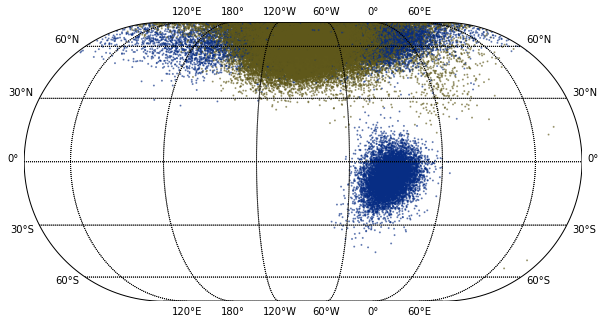

In [17]:
cmap = sns.light_palette("green",as_cmap=True)
# lon_0, lat_0 are the center point of the projection.                                                                                                      
# resolution = 'l' means use low resolution coastlines.    
plt.figure(figsize=(10,10))
data1 = np.loadtxt("kink1.dat")

colors = np.array(["#5F581A"]*len(data1))
#print(list(np.where(data0[:,3]>6.5)[0]))
colors[list(np.where(data1[:,3]>6.5)[0])] = "#072D84"

#colors[list(np.where(data0[:,3]>10)[0])] = "#2BA8C1"

m = Basemap(projection='eck4',lon_0=-90,resolution='h')
#m.drawcoastlines()                                                                                                                                         
#m.fillcontinents(color='coral',lake_color='aqua')                                                                                                          
# draw parallels and meridians.                                                                                                                             
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
#m.drawmapboundary(fill_color='aqua')
xpt,ypt = m(data1[:,1],90-data1[:,2])
#xpt,ypt = m(0,0)
m.scatter(xpt,ypt,s=1,marker="o",alpha=0.5,c=colors)

parallels = np.arange(-90,91,30)
# labels = [left,right,top,bottom]
_ = m.drawparallels(parallels,labels=[True,True,True,True,True,True,True])
meridians = np.arange(0.,361.,60.)
_ = m.drawmeridians(meridians,labels=[True,True,True,True,True,True,True])
#plt.savefig("SL5a_mappamondo.png",dpi=600)
#plt.close()

